In [2]:
%env SPOTIPY_CLIENT_ID= 63943ce4afe14c4492a291a72ec75d19
%env SPOTIPY_CLIENT_SECRET= 6c519273fd4c4b68be537f7a169bb5b2

env: SPOTIPY_CLIENT_ID=63943ce4afe14c4492a291a72ec75d19
env: SPOTIPY_CLIENT_SECRET=6c519273fd4c4b68be537f7a169bb5b2


In [3]:
import pandas as pd
import numpy as np
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from collections import Counter

client_credentials_manager = SpotifyClientCredentials()
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
for term in ["COVID","corona","Quarantine 2020", "Coronavirus"]:

    print(sp.search('q="{}"'.format(term), type='playlist')['playlists']['total'])

3894
3772
12195
1079


In [5]:

def batch_proccess(x,lista):

    for i in x['playlists']['items']:
    
        lista.append({"name" : i['name'], "total":i["tracks"]['total'], "uri":i["uri"]})

In [6]:
list_of_playlists = []
for term in ["COVID","corona","Quarantine 2020", "Coronavirus"]:
    for i in range(0,2000,50):
        try:
            init_data = sp.search('q="{}"'.format(term), type='playlist', limit=50, offset=i)
            batch_proccess(init_data,list_of_playlists)
        except:
            print("Error")

In [7]:
playlists = pd.DataFrame(list_of_playlists).drop_duplicates().reset_index(drop=True)

In [8]:
playlists

,name,total,uri
0,COVID-19 Quarantine Party,111,spotify:playlist:55V6HUzPnISl7ADpE3yfUD
1,Calma,151,spotify:playlist:37i9dQZF1DWY5LGZYBBHHz
2,quarantine Vibes | Covid 19 |,20,spotify:playlist:6zjC569rXoYGOLwPUt37WW
3,COVID-19 Quarantine Party,37,spotify:playlist:1Tn6OrkJhOYO5u6y16erqB
4,Canciones Mas Virales que el Coronavirus 🦠🎶,80,spotify:playlist:4Y2h9TZNZersxSYeXujCNu
...,...,...,...
6382,#StayHome 2020,55,spotify:playlist:4AYTrFDQUuXh62RCACk2XZ
6383,Home Office (Edición Cuarentena),60,spotify:playlist:2tOIxDUN8BUSV4V2Yfcaj6
6384,#fiqueemcasa,14,spotify:playlist:1sMLaZfiJFmPYteqFKcRhM
6385,Songs inspired by and of comfort in Corona times,20,spotify:playlist:6tGbydg14VCMq3OuKxmpAp


In [9]:
playlists.to_csv("playlists.csv")

In [10]:
songs = []
count = 0
for uri in playlists['uri']:
        length = sp.playlist_tracks(uri)['total']
        print(len(songs))
#         if (count == -1):
#             break
        for i in range(0,length, 50):
            init_data = sp.playlist_tracks(uri, limit=50, offset=i)
            try:
                for k in init_data['items']:
                    songs.append(k['track']["uri"])
                    if (len(songs) < 1000):
                        count = -1
            except:
                pass


470392
470927
470944
470975
471005
471018
471032
471118
471184
471207
471258
471315
471364
471395
471572
471701
471732
471906
472041
472104
472266
472382
472614
472844
472908
473004
473046
473126
473242
473268
473311
473369
473415
473438
473487
473513
473564
473620
473693
473756
473786
473892
474003
474059
474065
474089
474129
474179
474212
474282
474343
474363
474454
474506
474570
474603
474620
474721
474765
474804
474826
474937
474966
475025
475066
475119
475137
475169
475352
475391
475417
475472
475496
475545
475633
475676
475706
476720
476755
476793
476817
476857
476975
477098
477138
477225
477248
477404
477504
477609
477664
477692
477729
477777
477875
477892
477964
478008
478143
478183
478233
478338
478402
478423
478446
478657
478816
478879
478911
478917
478949
479158
479316
479385
479545
480066
480106
480140
480189
480223
480342
480390
480740
480791
480832
480909
481243
481270
481291
481311
481370
481429
481482
481515
481544
481884
481950
482002
482035
482384
482486
482527
48256

In [11]:
len(songs)

769659

In [12]:
songs_df = pd.DataFrame.from_dict(Counter(songs), orient='index').reset_index().rename(columns={"index":"uri", 0:"count"})

In [13]:
songs_df

,uri,count
0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,377
1,spotify:track:0VgkVdmE4gld66l8iyGjgx,162
2,spotify:track:2NxIIb2OZ1DSbfWAH0W47B,7
3,spotify:track:2xLMifQCjDGFmkHkpNLD9h,290
4,spotify:track:66s45uMhk7Y4z0xUgESdm3,62
...,...,...
305891,spotify:track:5vDGAXUog2hzpdiMedx77a,1
305892,spotify:track:4Voew9zQy9bclFrAjO6DNf,1
305893,spotify:track:25GPP7Ox2fXzfHK6765HVJ,1
305894,spotify:track:525lC9vaHu2w3sQsYjNpIA,1


In [14]:
songs_df.to_csv("unfilteredsongs.csv")

In [15]:
songs_df[(songs_df['count']>9) & (songs_df['count']<900)].describe()

,count
count,11580.000000
mean,25.983247
std,31.212859
min,10.000000
25%,12.000000
50%,17.000000
75%,28.000000
max,598.000000


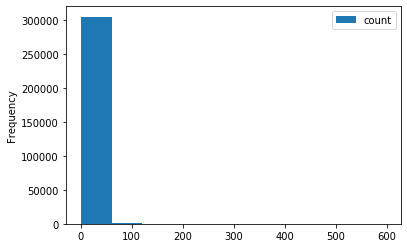

In [16]:
%matplotlib inline
songs_df[(songs_df['count']>0) & (songs_df['count']<900)].plot.hist()

In [17]:
songs_df_f = songs_df[songs_df['count']>9]

In [18]:
def data_enrich(x):
    
    data = sp.track(x['uri'])

    name = data['name']
    pop = data['popularity']
    date = data['album']['release_date']

    features = sp.audio_features(x['uri'])



    return {**x, "name" : name, 'release_date': date, "popularity" : pop,
            'explicit' : data['explicit'] , **features[0] }

In [19]:
final_songs_df = songs_df_f.apply(lambda x : data_enrich(x) , axis=1, result_type="expand")

In [20]:
final_songs_df = final_songs_df.drop(columns=['id','track_href','analysis_url','time_signature','type'])

In [21]:
final_songs_df

,uri,count,name,release_date,popularity,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,spotify:track:6I9VzXrHxO9rA9A5euc8Ak,377,Toxic,2003-11-13,79,False,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,198800
1,spotify:track:0VgkVdmE4gld66l8iyGjgx,162,Mask Off,2017-06-30,80,True,0.833,0.434,2,-8.795,1,0.4310,0.01020,0.021900,0.1650,0.281,150.062,204600
3,spotify:track:2xLMifQCjDGFmkHkpNLD9h,290,SICKO MODE,2018-08-03,89,True,0.834,0.730,8,-3.714,1,0.2220,0.00513,0.000000,0.1240,0.446,155.008,312820
4,spotify:track:66s45uMhk7Y4z0xUgESdm3,62,Unwell - 2007 Remaster,2007-09-29,62,False,0.442,0.793,9,-5.152,1,0.0347,0.04560,0.000000,0.3280,0.437,80.985,237267
5,spotify:track:5veJDT0MLsLbhYsx42GXUD,361,Don't Stand So Close To Me,1980-10-03,69,False,0.799,0.506,2,-9.414,1,0.0606,0.04530,0.001070,0.0365,0.518,140.309,242667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216838,spotify:track:3rXCZRMiMZp0feGcYXpwYX,10,Cowboy Take Me Away,1999-08-27,68,False,0.467,0.622,6,-7.255,1,0.0310,0.36500,0.005270,0.0982,0.455,164.418,287267
219263,spotify:track:6qwLieyhZ2vhn3xuIOrw32,10,Let It Go,2020-07-10,69,True,0.651,0.477,2,-6.775,1,0.0443,0.07960,0.000000,0.1000,0.217,112.668,191587
231094,spotify:track:52lGuLAkIVbm4LZkSf9nj0,11,Kinfolks,2020-04-03,69,False,0.569,0.807,0,-4.584,1,0.0464,0.08760,0.000000,0.1640,0.883,76.011,181933
235812,spotify:track:2KkNkv6ciB6bt2hvHtOrin,12,Wake Up Love,2020-06-12,67,True,0.583,0.766,11,-4.743,0,0.4050,0.50200,0.000002,0.1590,0.203,131.374,215329


In [22]:
final_songs_df.to_csv("songs.csv")